# 1 문제정의

### 1.0 주제선정 배경

- 어려운 경기 속에서 조금이라도 경제적인 요소를 고려하는 사람들을 위해 유지비가 낮은 차량 선택에 도움을 주는 예측 모델을 만드는 것을 목표로 한다.

### 1.1 문제설명
경제적인 요소를 고려하는 사람들을 위해 연비가 높은 차량을 선정할 때 원하는 연비의 차량에 대해 필요한 대략적인 차량가격을 예측하고자 한다. 

### 1.2 자료 수집처 
- 'https://www.data.go.kr/data/15005963/fileData.do' 공공데이터 포털
- 'https://www.carisyou.com/' 카이즈유 

### 1.3 변수 설명
- 모델명 : 자동차 모델명 
- 제조사 : 국내외 자동차 제조사
- 유종 : 자동차 유종
- 배기량 : 자동차 배기량
- 변속형식 : 자동차 변속기어형식
- 복합연비 : 도심연비와 고속도로주행 연비에 각각 55%, 45%의 가중치를 적용하여 산출된 연비
- 등급 : 도심연비와 고속도로 주행 연비에 55, 45%의 가중치를 적용해 산출하는 연료비율당 이동 거리, 즉 연료의 효율 나타냄
- CO2배출량 : 자동차 이산화탄소 배출량
- 분류 : 배기량을 기준으로 나눈 경차, 소형차, 중형차, 대형차
- 가격 : 가격은 카이즈유 사이트를 기준으로 하여 최고값으로 한다, 카이즈유에 없는 경우는 구글 검색을 통하여 구한다.

# 2 DataFrame 생성

In [148]:
import pandas as pd

In [149]:
data = pd.read_csv('data.csv', encoding = 'utf-16')
data

,Unnamed: 0,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,0,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1180
1,1,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1195
2,2,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1234
3,3,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1280
4,4,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0,경차,1020
...,...,...,...,...,...,...,...,...,...,...,...
110,115,"""K7 2.2디젤 (PE/17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3500
111,116,"""K7 2.2디젤 (17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3505
112,117,스팅어 2.2디젤 2WD_18인치 타이어 (15),기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3870
113,118,"""K7 2.2디젤 (PE/18""""타이어)""",기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3515


In [150]:
del data['Unnamed: 0']

In [151]:
data

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1180
1,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1195
2,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1234
3,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1280
4,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0,경차,1020
...,...,...,...,...,...,...,...,...,...,...
110,"""K7 2.2디젤 (PE/17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3500
111,"""K7 2.2디젤 (17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3505
112,스팅어 2.2디젤 2WD_18인치 타이어 (15),기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3870
113,"""K7 2.2디젤 (PE/18""""타이어)""",기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3515


### 데이터 앞 행 6개

In [152]:
data.head(6)

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1180
1,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차,1195
2,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1234
3,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1280
4,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0,경차,1020
5,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0,경차,1060


### 데이터 뒤 행 6개

In [153]:
data.tail(6)

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
109,C220 d 4Matic,벤츠,경유,2143,자동9,14.7,2등급,129.0,대형차,4690
110,"""K7 2.2디젤 (PE/17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3500
111,"""K7 2.2디젤 (17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3505
112,스팅어 2.2디젤 2WD_18인치 타이어 (15),기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3870
113,"""K7 2.2디젤 (PE/18""""타이어)""",기아,경유,2199,자동8,14.5,2등급,131.0,대형차,3515
114,C220 d,벤츠,경유,2143,자동9,14.5,2등급,131.0,대형차,4650


### 데이터 행 / 열 개수

In [154]:
data.shape

(115, 10)

### 데이터 요약 정보

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     115 non-null    object 
 1   제조사     114 non-null    object 
 2   유종      114 non-null    object 
 3   배기량     115 non-null    int64  
 4   변속형식    115 non-null    object 
 5   복합연비    115 non-null    float64
 6   등급      115 non-null    object 
 7   CO2배출량  115 non-null    float64
 8   분류      115 non-null    object 
 9   가격      115 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 9.1+ KB


In [156]:
data.dtypes

모델명        object
제조사        object
유종         object
배기량         int64
변속형식       object
복합연비      float64
등급         object
CO2배출량    float64
분류         object
가격          int64
dtype: object

### 데이터 변수들의 값

In [157]:
data['모델명'].unique()

array(['모닝(JA) 1.0가솔린_밴형 (15)', '모닝(JA)1.0가솔린 (15)',
       '모닝(JA) 1.0가솔린 (16인치 타이어) (15)',
       '모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15)', '스파크 밴 1.0', '스파크 1.0',
       '"스토닉 1.0 T-GDI 7DCT (15""타이어)"', '"스토닉 1.0 T-GDI 7DCT (17""타이어)"',
       '레이 1.0가솔린 (2015년형)', '레이 1.0가솔린 (PE, 14인치 타이어)',
       '"레이 1.0가솔린 밴형 (PE, 14인치 타이어)"', '레이 1.0가솔린 밴형 (PE, 14인치 타이어)\t',
       '모닝(JA) 1.0T-GDI_14인치 (15)', '레이 1.0가솔린_밴형 (15)', '다마스 5인승',
       '다마스밴', '라보롱카고', '라보5MT', 'TWIZY Urban(2인승)', 'TWIZY Urban(1인승)',
       '아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT', "아이오닉 1.6GDI 하이브리드 6DCT_15''타이어",
       '아이오닉 1.6GDI 플러그인하이브리드_6DCT (15)',
       "아이오닉 1.6GDI 하이브리드 6DCT_17''타이어", "니로 1.6GDI 하이브리드_16''타이어 (15)",
       '코나 1.6GDI 하이브리드 (16" 타이어)', '토요타 Prius C',
       '니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15)',
       'K3 1.6 디젤(4DR) 7DCT_ISG (15)',
       "아반떼(AD) 1.6디젤_7DCT ISG (15''/16''타이어) (15)",
       '엑센트 1.6디젤 (4DR) (15)', '아반떼(AD) 1.6디젤 (15)',
       'CHEVROLET\u3000VOLT', '아반떼(AD PE) 1.6디젤 7DCT',
       "

In [158]:
data['복합연비'].unique()

array([15.4, 15.3, 15. , 14.7, 13.7, 13.5, 13. , 12.7,  8.8,  8.6,  7.9,
       28.3, 22.4, 20.5, 20.2, 19.5, 19.3, 18.6, 18.4, 18.2, 17.9, 17.8,
       17.7, 17.6, 17.5, 17.4, 17.3, 17.2, 17.1, 17. , 21.9, 21.4, 20.9,
       20.1, 19.8, 19.1, 18.9, 18.8, 18. , 16.9, 16.8, 16.7, 16.5, 16.4,
       16.3, 16.1, 16.6, 16.2, 15.9, 15.7, 15.5, 15.2, 15.1, 14.9, 14.8,
       14.6, 14.5])

In [159]:
data['분류'].unique()

array(['경차', '소형차', '중형차', '대형차'], dtype=object)

In [160]:
data['가격'].unique()

array([1180, 1195, 1234, 1280, 1020, 1060, 1030, 1058, 1125, 1151, 1185,
       1867, 2111, 1260, 1350, 1300, 1190,  993,  988,  862,  873, 1430,
       1330, 3383, 2725, 3134, 2590, 2749, 2270, 3242, 2420, 2155, 1934,
       2071, 4593, 2060, 1986, 2896, 1599, 2180, 1914, 1855, 1617, 2144,
       1954, 2075, 3378, 3500, 4770, 3693, 2961, 2754, 4180, 3579, 4430,
       3397, 3223, 3400, 3000, 2800, 2900, 3880, 4000, 3100, 4080, 5760,
       2500, 4540, 5000, 2400, 4220, 6680, 3870, 4740, 3975, 4432, 3590,
       4260, 3700, 6000, 4447, 4190, 3868, 5750, 3860, 3632, 4300, 5800,
       4690, 3505, 3515, 4650], dtype=int64)

# 기술 통계 분석

In [161]:
data['복합연비'].describe()

count    115.000000
mean      16.322609
std        2.959079
min        7.900000
25%       14.800000
50%       16.700000
75%       17.650000
max       28.300000
Name: 복합연비, dtype: float64

In [162]:
data['가격'].describe()

count     115.000000
mean     2932.739130
std      1363.645405
min       862.000000
25%      1890.500000
50%      2961.000000
75%      3927.500000
max      6680.000000
Name: 가격, dtype: float64

In [163]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [164]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rcParams['font.family'] = 'New Gulim'

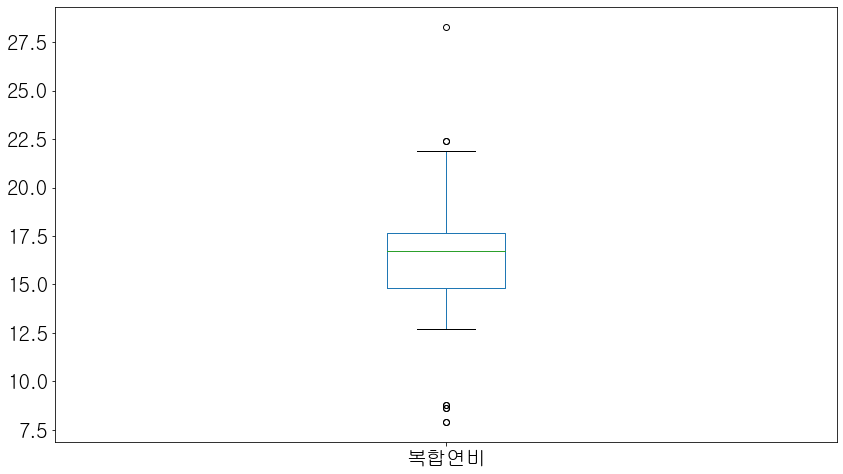

In [165]:
data['복합연비'].plot(kind='box')

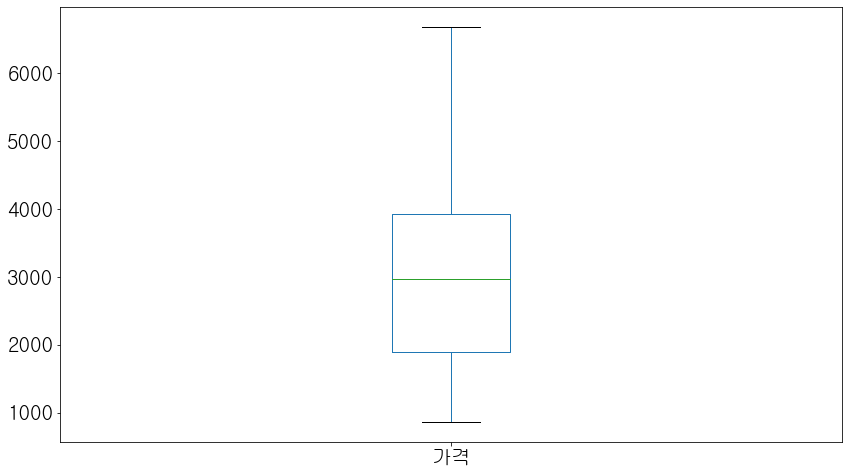

In [166]:
data['가격'].plot(kind='box')

# EDA

In [167]:
import seaborn as sns

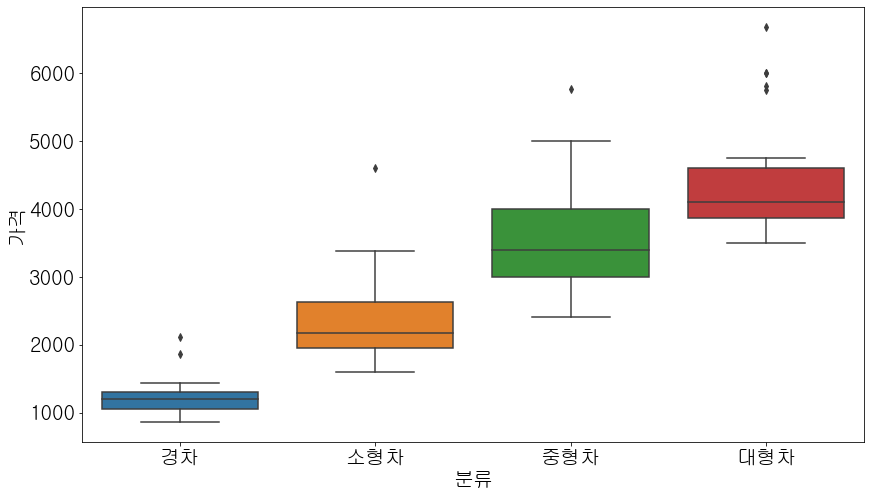

In [168]:
sns.boxplot(x = "분류", y = "가격", data = data)
plt.rcParams['figure.figsize'] = [14, 8] 
plt.rc('font', size = 20)
plt.show()

## 경차 가격 높은 순

In [169]:
aa= data[data['분류']=='경차'].sort_values('가격', ascending = False)
aa

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
13,"""스토닉 1.0 T-GDI 7DCT (17""""타이어)""",기아,휘발유,998,자동7,13.5,3등급,123.0,경차,2111
12,"""스토닉 1.0 T-GDI 7DCT (15""""타이어)""",기아,휘발유,998,자동7,13.7,3등급,121.0,경차,1867
25,TWIZY Urban(2인승),르노삼성,전기,0,없음,7.9,고속,0.0,경차,1430
18,"레이 1.0가솔린 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0,경차,1350
15,"레이 1.0가솔린 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0,경차,1350
26,TWIZY Urban(1인승),르노삼성,전기,0,없음,7.9,고속,0.0,경차,1330
16,"""레이 1.0가솔린 밴형 (PE, 14인치 타이어)""",기아,휘발유,998,자동4,13.0,경형,127.0,경차,1300
20,레이 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,12.7,경형,129.0,경차,1300
17,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)\t",기아,휘발유,998,자동4,13.0,경형,127.0,경차,1280
3,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차,1280


### 경차 가격 boxplot

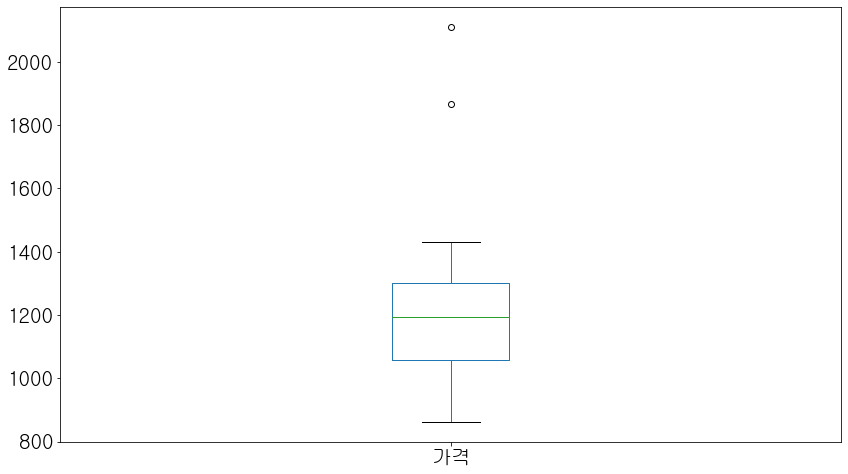

In [170]:
aa['가격'].plot(kind = 'box')

In [171]:
aa[aa['가격']==aa['가격'].max()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
13,"""스토닉 1.0 T-GDI 7DCT (17""""타이어)""",기아,휘발유,998,자동7,13.5,3등급,123.0,경차,2111


In [172]:
aa[aa['가격']==aa['가격'].min()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
23,라보롱카고,한국지엠,LPG,796,수동5,8.6,경형,148.0,경차,862


## 소형차 가격 높은 순

In [173]:
bb= data[data['분류']=='소형차'].sort_values('가격', ascending = False)
bb

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
39,CHEVROLET VOLT,GM,전기+휘발유,1490,무단변속,17.8,PHEV,15.0,소형차,4593
27,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,1580,자동6,28.3,PHEV,17.0,소형차,3383
34,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,1580,자동6,18.6,PHEV,26.0,소형차,3242
29,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,1580,자동6,20.5,PHEV,17.0,소형차,3134
42,"셀토스 1.6디젤 2WD (16"" 타이어)",기아,경유,1598,자동7,17.6,1등급,105.0,소형차,2896
31,니로 1.6GDI 하이브리드_16''타이어 (15),기아,휘발유,1580,자동6,19.5,1등급,79.0,소형차,2749
28,아이오닉 1.6GDI 하이브리드 6DCT_15''타이어,현대,휘발유,1580,자동6,22.4,1등급,69.0,소형차,2725
30,아이오닉 1.6GDI 하이브리드 6DCT_17''타이어,현대,휘발유,1580,자동6,20.2,1등급,78.0,소형차,2590
33,토요타 Prius C,토요타,휘발유,1497,무단변속,18.6,1등급,84.0,소형차,2590
35,K3 1.6 디젤(4DR) 7DCT_ISG (15),기아,경유,1582,자동7,18.4,1등급,100.0,소형차,2420


### 소형차 가격 boxplot

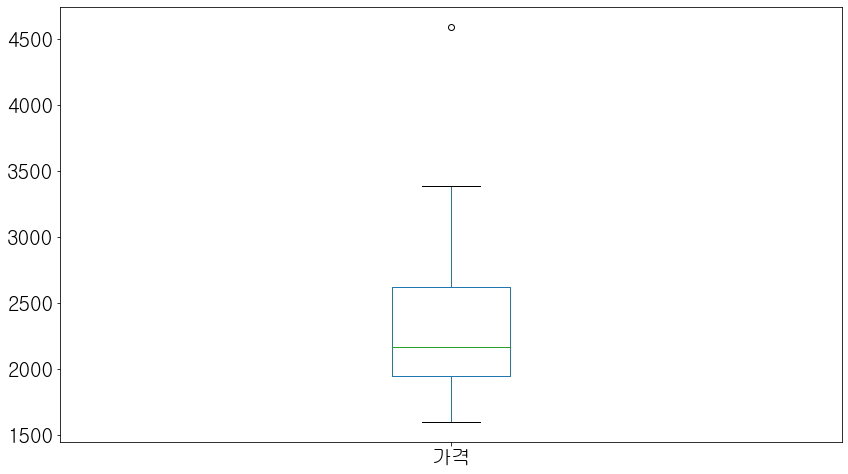

In [174]:
bb['가격'].plot(kind = 'box')

In [175]:
bb[bb['가격']==bb['가격'].max()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
39,CHEVROLET VOLT,GM,전기+휘발유,1490,무단변속,17.8,PHEV,15.0,소형차,4593


In [176]:
bb[bb['가격']==bb['가격'].min()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
44,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0,소형차,1599


## 중형차 가격 높은 순

In [177]:
cc= data[data['분류']=='중형차'].sort_values('가격', ascending = False)
cc

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
78,C350 e,벤츠,전기+휘발유,1991,자동7,16.9,PHEV,80.0,중형차,5760
83,Lincoln MKZ Hybrid,포드,휘발유,1999,무단변속,16.3,1등급,97.0,중형차,5000
57,토요타 Prius Prime,토요타,전기+휘발유,1798,무단변속,21.4,PHEV,23.0,중형차,4770
80,렉서스 UX250h 2WD,토요타,휘발유,1987,무단변속,16.7,1등급,95.0,중형차,4540
63,ACCORD HYBRID,혼다,휘발유,1993,무단변속,18.9,1등급,82.0,중형차,4430
61,ACCORD HYBRID,혼다,휘발유,1993,무단변속,19.3,1등급,83.0,중형차,4180
76,렉서스 CT200h,토요타,휘발유,1798,무단변속,17.0,1등급,93.0,중형차,4080
71,"쏘나타 2.0GDI 하이브리드 개조차 (17""""""""타이어) (15)""""",현대,휘발유,1999,자동6,17.4,1등급,91.0,중형차,4000
75,쏘나타 2.0GDI 플러그인 하이브리드 개조차 (15),현대,전기+휘발유,1999,자동6,17.1,PHEV,25.0,중형차,4000
72,쏘나타 2.0GDI 플러그인하이브리드,현대,전기+휘발유,1999,자동6,17.2,PHEV,29.0,중형차,4000


### 중형차 가격 boxplot

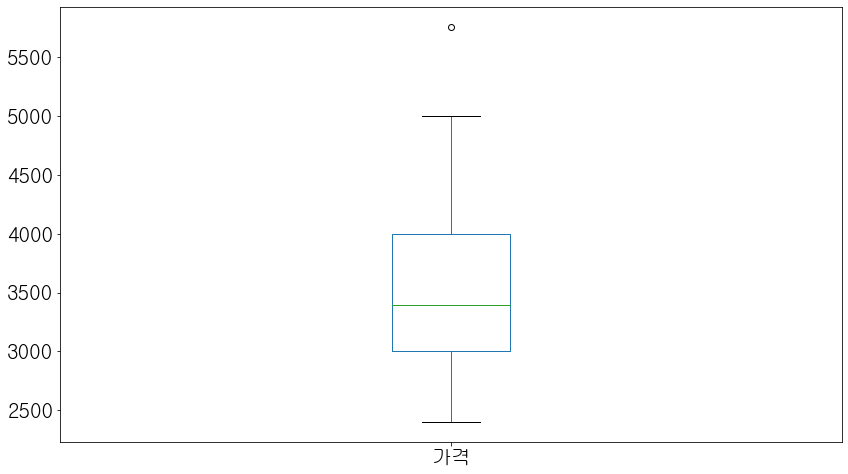

In [178]:
cc['가격'].plot(kind = 'box')

In [179]:
cc[cc['가격']==cc['가격'].max()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
78,C350 e,벤츠,전기+휘발유,1991,자동7,16.9,PHEV,80.0,중형차,5760


In [180]:
cc[cc['가격']==cc['가격'].min()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
84,"쏘나타(LF) 1.7디젤 개조차 7DCT (16"""""""" 타이어) (15)""""",현대,경유,1685,자동7,16.1,1등급,116.0,중형차,2400


## 대형차 가격 높은 순

In [181]:
dd= data[data['분류']=='대형차'].sort_values('가격', ascending = False)
dd

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
87,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차,6680
98,"C220 d ""(17""""_ 18""""_ 19"""" Tire)""",벤츠,경유,2143,자동9,15.2,2등급,124.0,대형차,6000
102,C220 d,벤츠,경유,2143,자동7,14.9,2등급,127.0,대형차,6000
108,C220 d Coupe,벤츠,경유,2143,자동9,14.7,2등급,128.0,대형차,5800
103,렉서스 ES300h,토요타,휘발유,2494,무단변속,14.9,2등급,108.0,대형차,5750
89,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차,4740
109,C220 d 4Matic,벤츠,경유,2143,자동9,14.7,2등급,129.0,대형차,4690
114,C220 d,벤츠,경유,2143,자동9,14.5,2등급,131.0,대형차,4650
99,G70 2.2디젤 2WD_17인치타이어 (15),현대,경유,2199,자동8,15.2,2등급,124.0,대형차,4447
92,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0,대형차,4432


### 대형차 가격 boxplot

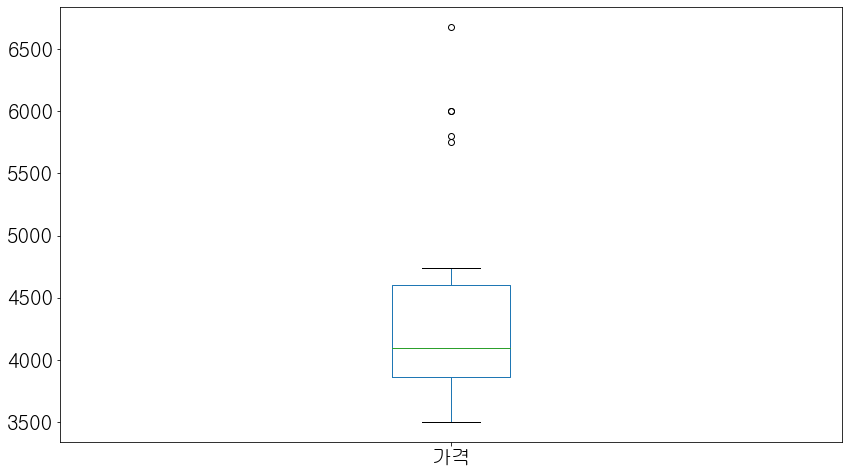

In [182]:
dd['가격'].plot(kind = 'box')

In [183]:
dd[dd['가격']==dd['가격'].max()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
87,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차,6680


In [184]:
dd[dd['가격']==dd['가격'].min()]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
105,K7(YG) 2.2디젤 17MY (17인치타이어) (15),기아,경유,2199,자동8,14.8,2등급,128.0,대형차,3500
110,"""K7 2.2디젤 (PE/17""""타이어)""",기아,경유,2199,자동8,14.6,2등급,130.0,대형차,3500


# 복합연비에 대한 가격 상관관계분석

In [185]:
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

### 경차의 복합연비와 가격

In [186]:
x=np.array(aa['복합연비'])
y=np.array(aa['가격'])
p=1

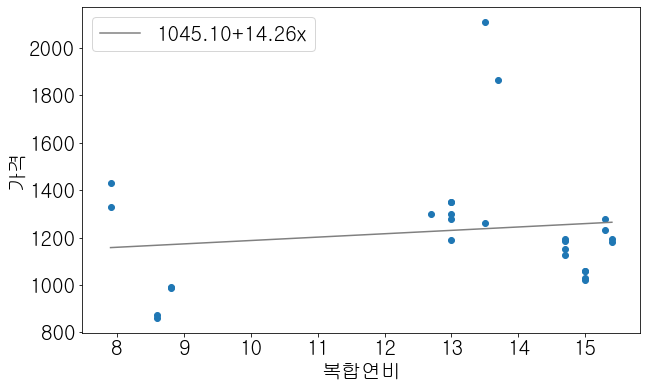

In [187]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [188]:
formula='복합연비~가격'
result=smf.ols(formula,aa).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.485
Time:                        12:41:24   Log-Likelihood:                -63.399
No. Observations:                  27   AIC:                             130.8
Df Residuals:                      25   BIC:                             133.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2341      2.450      4.586      0.000       6.188      16.280
가격             0.0014      0.002      0.709      0.485      -0.003       0.005
==============================================================================
Omnibus:                        4.202   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.738
Skew:                          -0.861   Prob(JB):                        0.154
Kurtosis:                       2.401   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
corr=stats.pearsonr(aa.복합연비, aa.가격)
corr

(0.14038069216400972, 0.48493097882932)

- 분석 결과, R-squared 는 0.020 으로 매우 낮은 값이 나왔다. 따라서 경차의 복합연비와 차량의 가격간에는 관계가 거의 없다고 볼 수 있다.

### 소형차의 복합연비와 가격

In [190]:
x=np.array(bb['복합연비'])
y=np.array(bb['가격'])
p=1

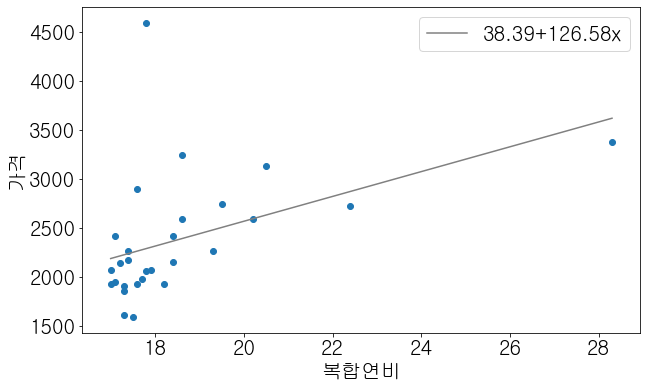

In [191]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [192]:
formula='복합연비~가격'
result=smf.ols(formula,bb).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     6.813
Date:                Fri, 03 Jul 2020   Prob (F-statistic):             0.0148
Time:                        12:41:25   Log-Likelihood:                -59.139
No. Observations:                  28   AIC:                             122.3
Df Residuals:                      26   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6070      1.547      9.439      0.000      11.426      17.788
가격             0.0016      0.001      2.610      0.015       0.000       0.003
==============================================================================
Omnibus:                       32.062   Durbin-Watson:                   2.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.285
Skew:                           2.160   Prob(JB):                     2.04e-21
Kurtosis:                      10.938   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
corr=stats.pearsonr(bb.복합연비, bb.가격)
corr

(0.4556774801790013, 0.014815198241621582)

- 분석 결과, R-squared 는 0.208로 매우 낮은 값이 나왔다. 따라서 소형차의 복합연비와 차량의 가격간에는 관계가 거의 없다고 볼 수 있다.

### 중형차의 복합연비와 가격

In [194]:
x=np.array(cc['복합연비'])
y=np.array(cc['가격'])
p=1

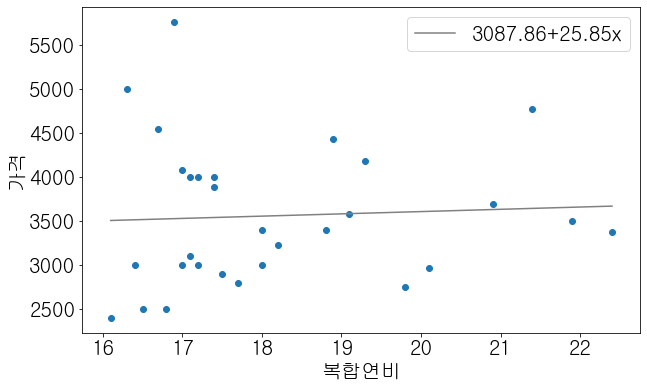

In [195]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [196]:
formula='복합연비~가격'
result=smf.ols(formula,cc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.08747
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.770
Time:                        12:41:25   Log-Likelihood:                -58.548
No. Observations:                  30   AIC:                             121.1
Df Residuals:                      28   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7414      1.485     11.951      0.000      14.700      20.782
가격             0.0001      0.000      0.296      0.770      -0.001       0.001
==============================================================================
Omnibus:                        6.031   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.205
Skew:                           1.020   Prob(JB):                       0.0741
Kurtosis:                       3.019   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
corr=stats.pearsonr(cc.복합연비, cc.가격)
corr

(0.055803875713753344, 0.769605408276897)

- 분석 결과, R-squared 는 0.003로 매우 낮은 값이 나왔다. 따라서 중형차의 복합연비와 차량의 가격간에는 관계가 거의 없다고 볼 수 있다.

### 대형차의 복합연비와 가격

In [198]:
x=np.array(dd['복합연비'])
y=np.array(dd['가격'])
p=1

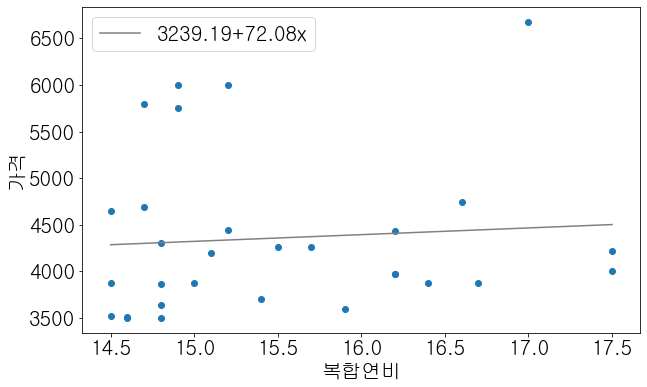

In [199]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [200]:
formula='복합연비~가격'
result=smf.ols(formula,dd).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.1686
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.685
Time:                        12:41:25   Log-Likelihood:                -39.470
No. Observations:                  30   AIC:                             82.94
Df Residuals:                      28   BIC:                             85.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1184      0.897     16.854      0.000      13.281      16.956
가격          8.303e-05      0.000      0.411      0.685      -0.000       0.000
==============================================================================
Omnibus:                        4.049   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.670
Skew:                           0.816   Prob(JB):                        0.160
Kurtosis:                       2.477   Cond. No.                     2.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
corr=stats.pearsonr(dd.복합연비, dd.가격)
corr

(0.07736097477042883, 0.6845010822469815)

- 분석 결과, R-squared 는 0.006로 매우 낮은 값이 나왔다. 따라서 대형차의 복합연비와 차량의 가격간에는 관계가 거의 없다고 볼 수 있다.

# 결론 

- 분석 결과, 경차의 복합연비와 차량의 가격간의 관계는 R-squared 는 0.020 으로 매우 낮은 값이 나왔다. 따라서, 관계가 거의 없다고 볼 수 있다.
- 소형차의 복합연비와 차량의 가격간의 관계는 R-squared 는 0.208 으로 매우 낮은 값이 나왔다. 따라서, 관계가 거의 없다고 볼 수 있다.
- 중형차의 복합연비와 차량의 가격간의 관계는 R-squared 는 0.003 으로 매우 낮은 값이 나왔다. 따라서, 관계가 거의 없다고 볼 수 있다.
- 대형차의 복합연비와 차량의 가격간의 관계는 R-squared 는 0.006 으로 매우 낮은 값이 나왔다. 따라서, 관계가 거의 없다고 볼 수 있다.
- 따라서, 복합연비만으로 가격을 예측하는 것은 어렵다고 볼 수 있다.

- 자동차는 기존의 단순 이동수단에서 사회적 성격을 가진 사치재로 발전하고 있다.
- 이는 자동차 구매 고려 요소가 디자인, 산업적 필요, 브랜드, 사회적 인식 등 다양하다는 것을 의미하며, 연비만으로 판단하기는 어려움을 뜻한다.

## 한계점

- 회귀모델 구성에 실패한 것은 구매고려요소에서 복합연비가 차지하는 비중이 낮았으며, 객관적인 평가가 어려운 요소 - 디자인 등에 대한 고려가 없어서 발생한 것으로 사료된다.
- 향후에는 이런 복합적인 요소를 고려할 방안을 찾아서 진행해야 한다.